# Horizontal and Vertical Shift Augmentation

In [1]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import numpy as np
import cv2
import os
import shutil
import pandas as pd

# Load Data

In [2]:
base_dir = '/home/dell/Documentos/COVID-Net/data/'
temp_dir = '/home/dell/Documentos/rn-cin-covid/temp_dir/'
train_dir = os.path.join(base_dir, 'train')
training_set = os.listdir(train_dir)
train_labels_file = '/home/dell/Documentos/rn-cin-covid/data/train_split.txt'    

# Random Width Shift

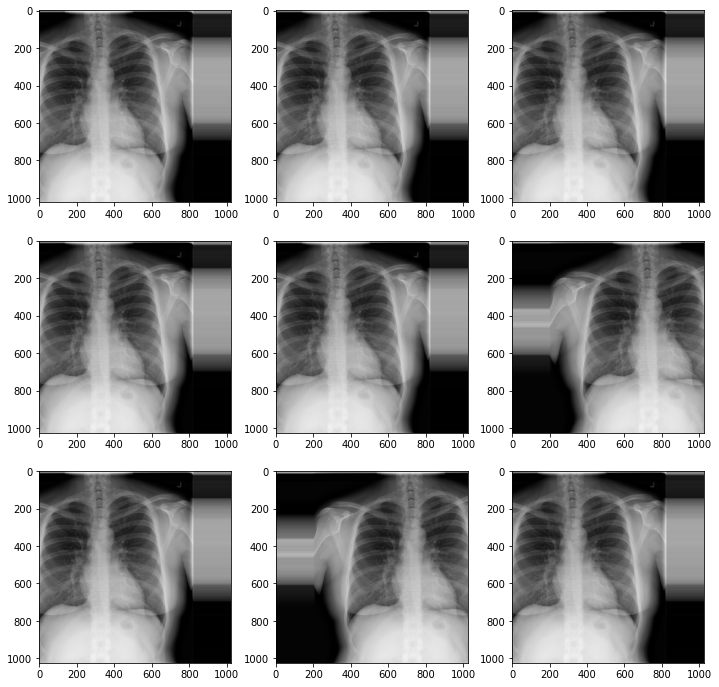

In [3]:

image_name = np.random.choice(training_set)

img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=[-200,200])
datagen.fit(samples)
it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()


# Random Height Shift


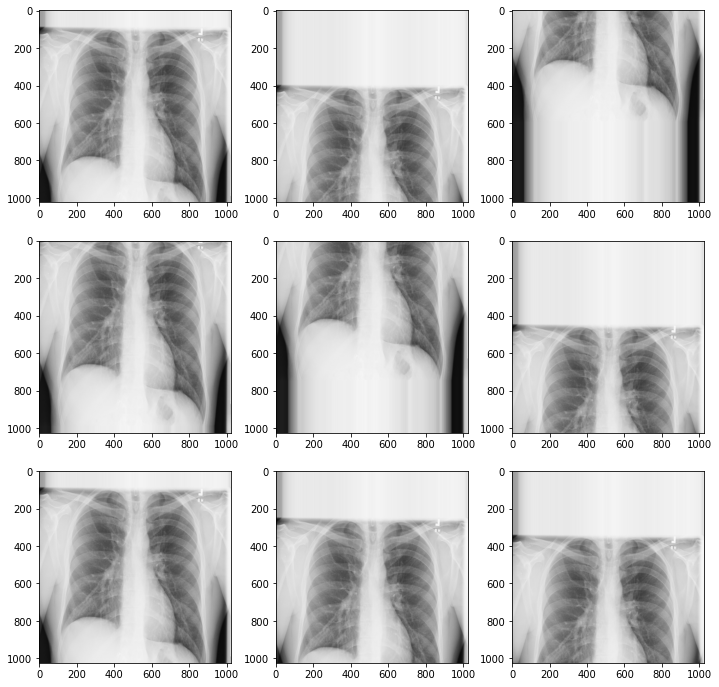

In [4]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))
for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
    
pyplot.show()

# Horizontal and Vertical Flip Augmentation

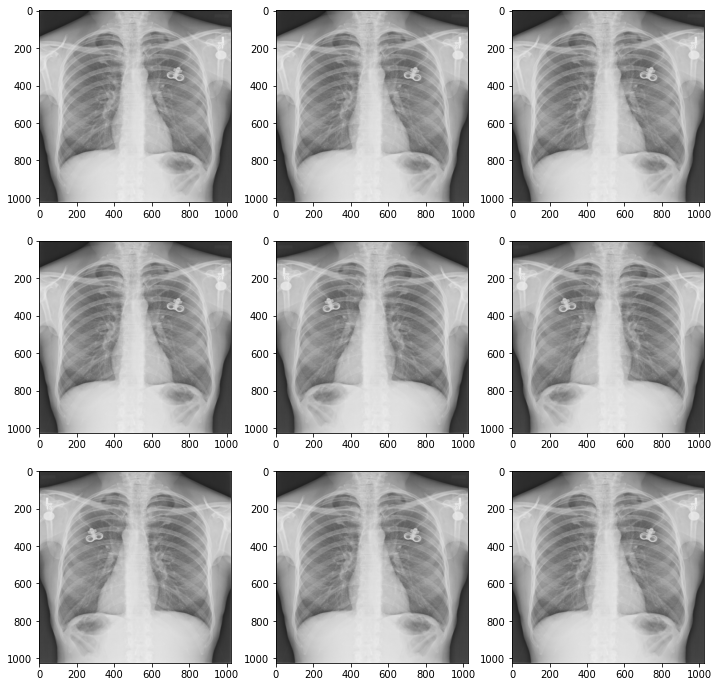

In [5]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Random Rotation Augmentation

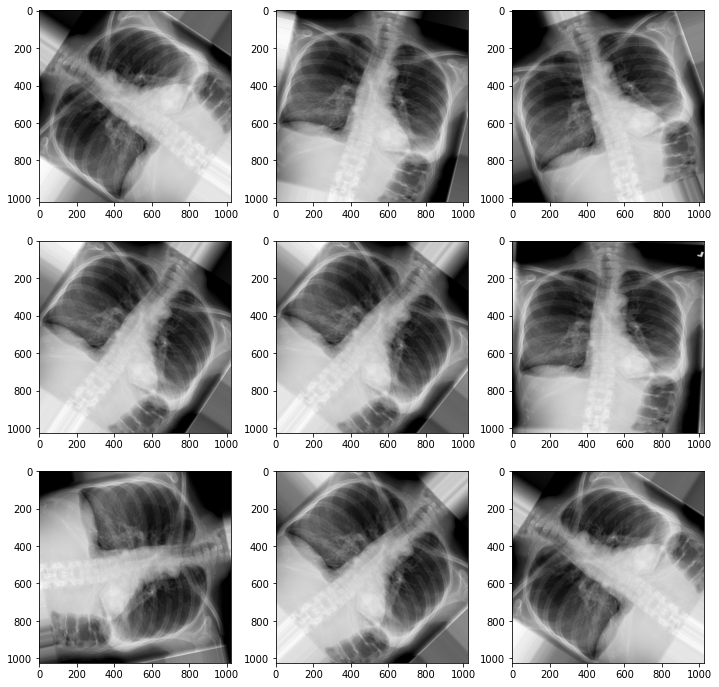

In [6]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Random Brightness Augmentation

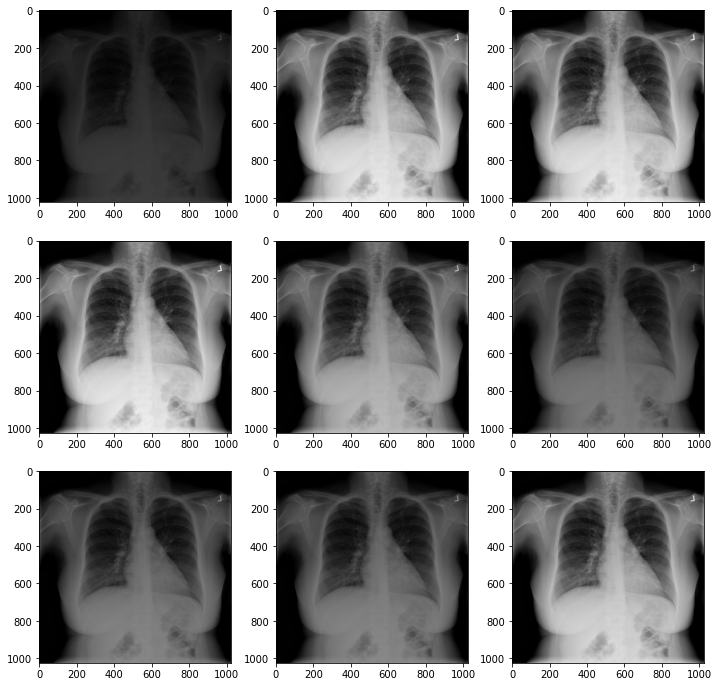

In [7]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Random Zoom Augmentation

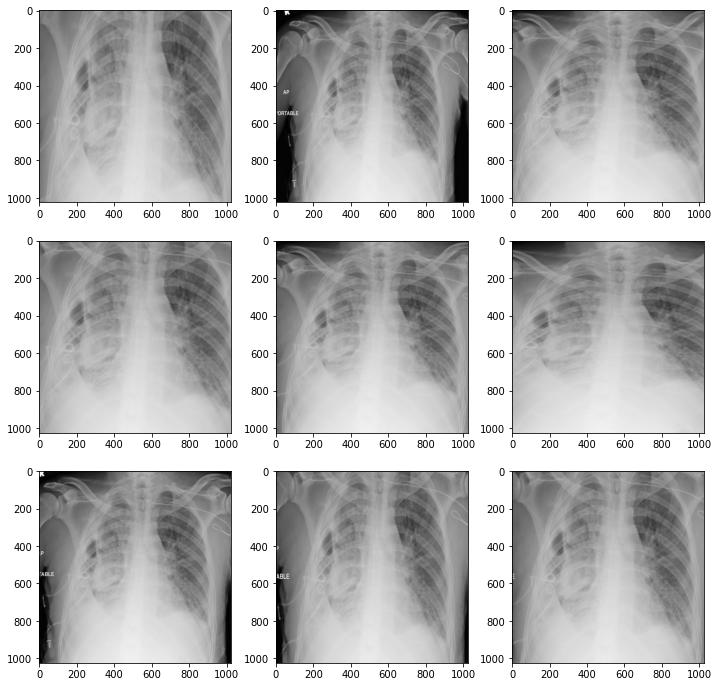

In [8]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Feature Wise Center


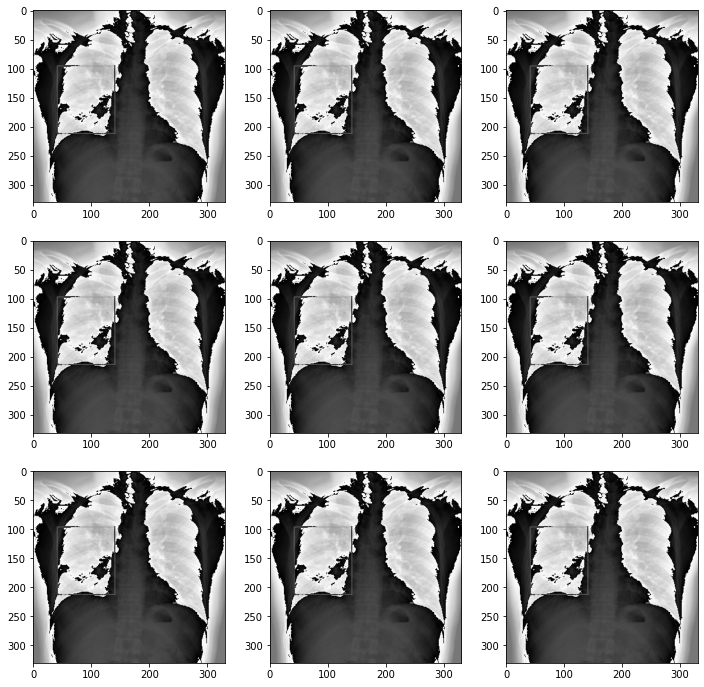

In [9]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(featurewise_center=True)
datagen.fit(samples)
it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Gaussian Noise

In [9]:

def gaussian_noise(basedir, imgpath):
    
    img = cv2.imread(os.path.join(basedir, imgpath), cv2.IMREAD_COLOR)   
    gauss = np.random.normal(0, 0.8, img.size)
    gauss = gauss.reshape(img.shape[0], img.shape[1], img.shape[2]).astype('uint8')
    imgnoise = cv2.add(img, gauss)
    imgnoise = cv2.cvtColor(imgnoise, cv2.COLOR_BGR2GRAY)
    imgnoise = cv2.cvtColor(imgnoise,cv2.COLOR_GRAY2RGB)

    return imgnoise


# Sample Without Gaussian Noise

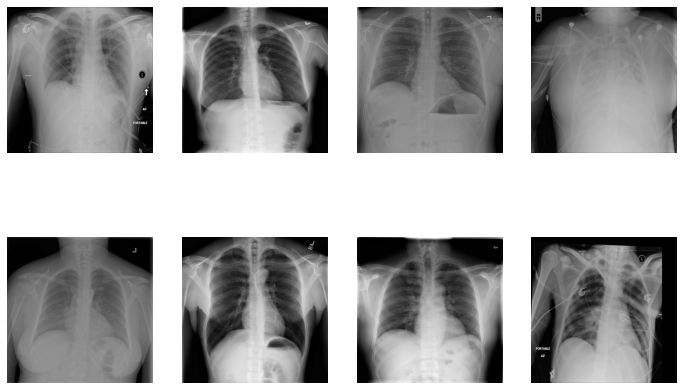

In [10]:
train_dir = os.path.join(base_dir, 'train')
training_set = os.listdir(train_dir)
pyplot.figure(figsize=(12, 12))

for i in range(8):    
    image = np.random.choice(training_set)
    ax = pyplot.subplot(3, 4, i + 1)
    img = load_img(os.path.join(train_dir, image))
    pyplot.imshow(img)
    pyplot.axis("off")
    
pyplot.show()

# Sample With Gaussian Noise

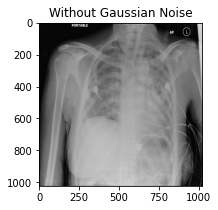

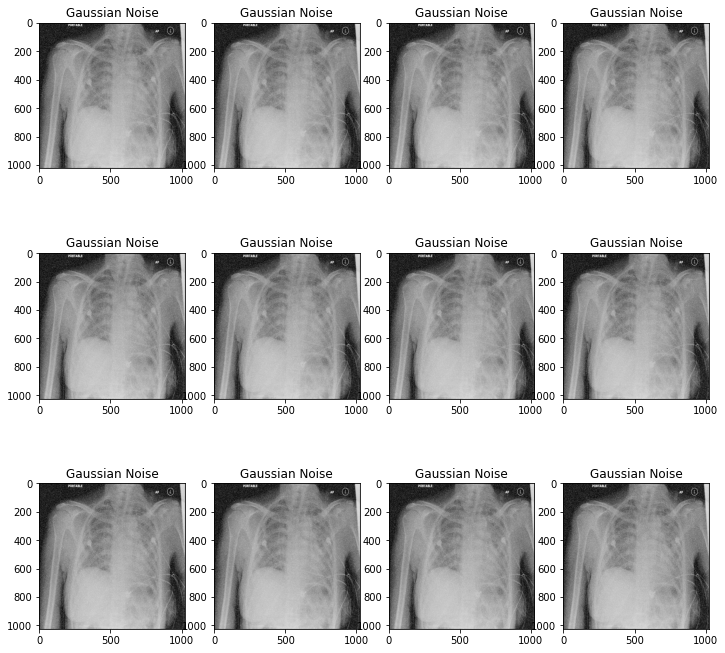

In [11]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))

pyplot.figure(figsize=(6, 3))
pyplot.title("Without Gaussian Noise")
pyplot.imshow(img)
pyplot.show()

pyplot.figure(figsize=(12, 12))

for i in range(12):
    ax = pyplot.subplot(3, 4, i + 1)
    gaussian_noise_image = gaussian_noise(
        train_dir, image_name
    )
    pyplot.title('Gaussian Noise')
    pyplot.imshow(gaussian_noise_image)

pyplot.show()


In [13]:
# print(training_set)

# Apply Gaussian Noise to All Training Data 

In [12]:
def get_gauss_labels():

    if not os.path.exists(temp_dir):
        os.mkdir(temp_dir)

    labels = []
    
    with open(train_labels_file, 'r') as file:
        content = file.readlines()
        labels.append(content)
        
    gauss_labels = {}
    all_indexes  = {}   
        
    for label in labels[0]:
        index = None
        pattern  = ['.jpg', '.jpeg', '.png', '.PNG', 'JPG', 'JPEG']
        filename = ''
        for pos in label.strip('\n').split(' '):
            for p in pattern:
                f = pos.endswith(p)
                if f: break

            if f: 
                filename = pos
                index    = label.strip('\n').split(' ').index(pos)
                break

        gauss_labels[filename] = label.strip('\n').split(' ')
        all_indexes[filename]  = index
    
    return gauss_labels, all_indexes

In [13]:

def apply_gaussian_noise():

    gauss_labels, all_indexes = get_gauss_labels()
    print("Applying Gaussian Noise to the data...")
    
    for i, image in enumerate(training_set):
        print('\r[' + '*'*int((i * 100)/len(training_set)) + ' '*int(100 - ((i) * (100/len(training_set)))) + ']', end='')

        gaussian_noise_image = gaussian_noise(
           train_dir, image
        )
        
        gauss_image_name = 'gauss_' + image
        
        gauss_labels[image][all_indexes[image]] = gauss_image_name
        
        cv2.imwrite(
            '{}'.format(os.path.join(temp_dir, gauss_image_name)),
            gaussian_noise_image
        )

    print("Generating gaussian train labels file... ")
    
    os. remove('data/train_labels_gauss.txt')
    
    with open('data/train_labels_gauss.txt', 'a') as f: 
        for key, value in gauss_labels.items(): 
            s = ' '.join([str(item) for item in value]) + '\n'
            f.write(s)

    print("Ok.")


In [14]:
apply_gaussian_noise()

Applying Gaussian Noise to the data...
[***************************************************************************************************]]Generating gaussian train labels file... 
Ok.


# Copy Imagens to Training Directory

In [15]:
train_dir = train_dir
temp_dir = temp_dir
os.chdir(temp_dir)

for image in os.listdir():
    shutil.copy(image, os.path.join(train_dir, image))
   

In [16]:
shutil.rmtree(temp_dir)